# Выпускная квалификационная работа по курсу «Data Science»

## Прогнозирование конечных свойств новых материалов (композиционных материалов)

### Кузьмина Е.В.

### Часть 3. Создание нейронной сети.

In [55]:
# Загружаем библиотеки

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import sklearn
import numpy as np

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer, LabelEncoder, MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow import keras as keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation
from pandas import read_excel, DataFrame, Series
from tensorflow.keras.models import Sequential
from numpy.random import seed
%config InlineBackend.figure_format = 'retina'

In [56]:
# Удаляем неинформативный столбец

In [2]:
df_good = pd.read_excel("D:\\data science\вкр\ВКР_композиты\df.xlsx")
df_good.drop(['Unnamed: 0'], axis = 1)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки
0,0.274768,0.651097,0.452951,0.079153,0.607435,0.509164,0.162230,0.272962,0.727777,0.514688,0,0.289334,0.546433
1,0.274768,0.651097,0.452951,0.630983,0.418887,0.583596,0.162230,0.272962,0.727777,0.514688,0,0.362355,0.319758
2,0.466552,0.651097,0.461725,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0,0.362355,0.494123
3,0.465836,0.571539,0.458649,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0,0.362355,0.546433
4,0.424236,0.332865,0.494944,0.511257,0.495653,0.509164,0.162230,0.272962,0.727777,0.514688,0,0.362355,0.720799
...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,0.361662,0.444480,0.560064,0.337550,0.333908,0.703458,0.161609,0.473553,0.472912,0.183151,1,0.660014,0.320103
918,0.607674,0.704373,0.272088,0.749605,0.294428,0.362087,0.271207,0.462512,0.461722,0.157752,1,0.768759,0.437468
919,0.573391,0.498274,0.254927,0.501991,0.623085,0.334063,0.572959,0.580201,0.587558,0.572648,1,0.301102,0.679468
920,0.662497,0.748688,0.454635,0.717585,0.267818,0.466417,0.496511,0.535317,0.341643,0.434855,1,0.458245,0.516112


In [58]:
# Делим данные на обучающую и тестовую выборки и выводим их размерность

In [3]:
in_d = df_good[['Плотность, кг/м3',
                  'модуль упругости, ГПа', 'Количество отвердителя, м.%',
                  'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
                  'Поверхностная плотность, г/м2',
                  'Потребление смолы, г/м2', 'Угол нашивки, град',
                  'Шаг нашивки', 'Плотность нашивки', 'Модуль упругости при растяжении, ГПа', 'Прочность при растяжении, МПа']]
out_d = df_good['Соотношение матрица-наполнитель']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(in_d, out_d, test_size = 0.3, random_state = 42)
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 645
Размер тестовой выборки: 277


In [5]:
normalizer = tf.keras.layers.Normalization(input_shape = [12,], axis = None)
normalizer.adapt(np.array(X_train))

In [6]:
X_train

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Потребление смолы, г/м2","Угол нашивки, град",Шаг нашивки,Плотность нашивки,"Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа"
481,0.643037,0.278232,0.234584,0.439240,0.321655,0.495611,0.623998,1,0.571430,0.433990,0.245292,0.578683
650,0.586130,0.463191,0.348338,0.616075,0.320131,0.204285,0.391352,1,0.317517,0.537455,0.966796,0.479890
483,0.532890,0.354250,0.758052,0.625457,0.716345,0.348479,0.237919,1,0.554280,0.619605,0.395444,0.569650
355,0.605695,0.692900,0.360136,0.654481,0.389632,0.456376,0.392215,0,0.474980,0.306469,0.163582,0.641999
850,0.170680,0.502517,0.470569,0.576124,0.477262,0.229392,0.682036,1,0.623942,0.429910,0.467485,0.436179
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.303772,0.201130,0.287544,0.329381,0.622672,0.026298,0.576014,0,0.549851,0.495193,0.566234,0.309596
270,0.777923,0.431133,0.526907,0.377453,0.646398,0.841346,0.500515,0,0.584309,0.410964,0.294088,0.486406
860,0.378127,0.731477,0.305836,0.655804,0.372042,0.227940,0.590147,1,0.380169,0.529197,0.791823,0.627286
435,0.781825,0.688797,0.467451,0.715422,0.431429,0.226518,0.329278,0,0.050576,0.965176,0.285892,0.456208


In [66]:
# Создаем сеть

In [28]:
nn_model = Sequential([
                    normalizer,
                    Dense(128, activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(1)
                    ])

nn_model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.0005))

In [30]:
nn_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               3         
 n)                                                              
                                                                 
 dense_15 (Dense)            (None, 128)               1664      
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,036
Trainable params: 12,033
Non-trainable params: 3
__________________________________________________

In [31]:
%%time
history = nn_model.fit(X_train, y_train, validation_split = 0.3, verbose = 1, epochs = 100)

Epoch 1/100
15/15 [==============================] - 1s 17ms/step - loss: 0.1968 - val_loss: 0.0658
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0659 - val_loss: 0.0566
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0420 - val_loss: 0.0501
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0392 - val_loss: 0.0463
Epoch 5/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0355 - val_loss: 0.0467
Epoch 6/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0325 - val_loss: 0.0448
Epoch 7/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0303 - val_loss: 0.0444
Epoch 8/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0288 - val_loss: 0.0431
Epoch 9/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0273 - val_loss: 0.0432
Epoch 10/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0260 - val_loss: 0.0438
Epoch 11

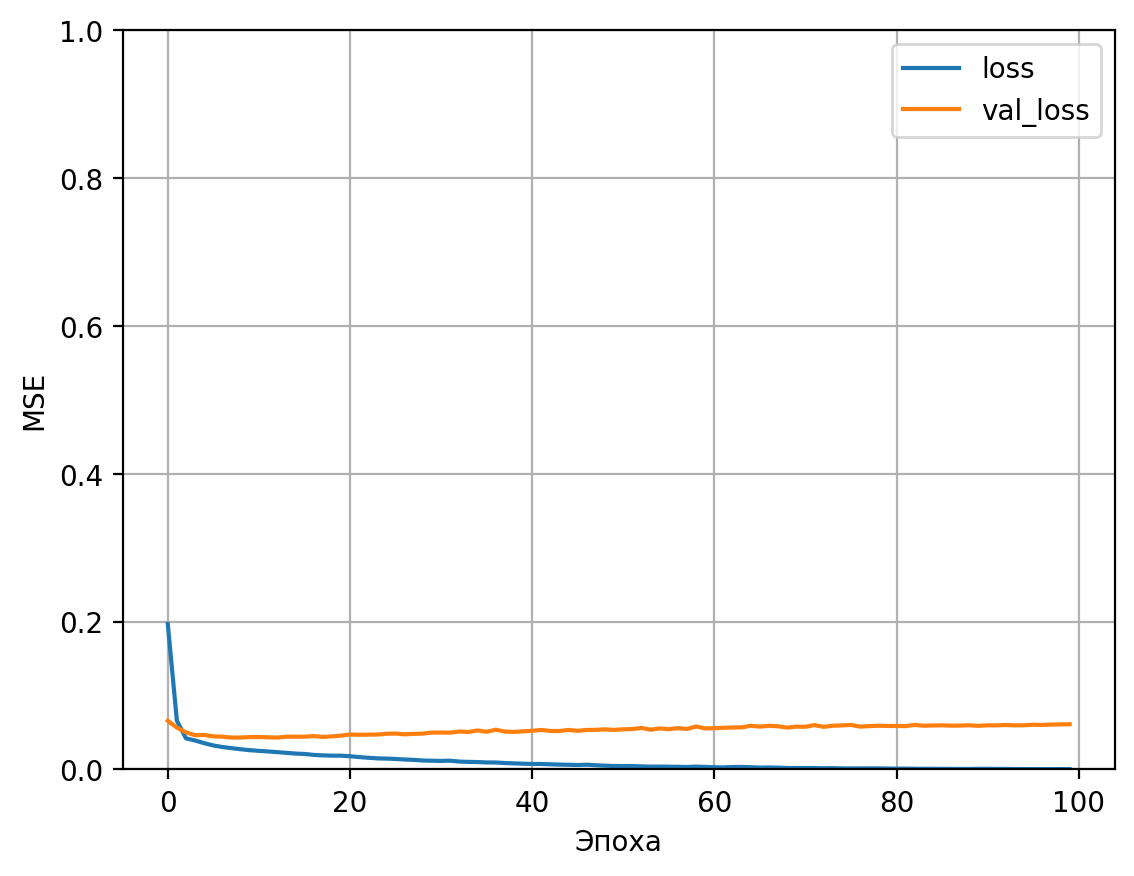

In [33]:
plot_loss(history)

In [65]:
# Пробуем изменить активатор и увеличиваем количество эпох

In [34]:
nn_model = Sequential([
                    normalizer,
                    Dense(128, activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'sigmoid'),
                    Dense(1)
                    ])

nn_model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.0005))

In [35]:
nn_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               3         
 n)                                                              
                                                                 
 dense_19 (Dense)            (None, 128)               1664      
                                                                 
 dense_20 (Dense)            (None, 64)                8256      
                                                                 
 dense_21 (Dense)            (None, 32)                2080      
                                                                 
 dense_22 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12,036
Trainable params: 12,033
Non-trainable params: 3
__________________________________________________

In [36]:
%%time
history = nn_model.fit(X_train, y_train, validation_split = 0.3, verbose = 1, epochs = 200)

Epoch 1/200
15/15 [==============================] - 1s 16ms/step - loss: 0.0949 - val_loss: 0.0374
Epoch 2/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0413 - val_loss: 0.0401
Epoch 3/200
15/15 [==============================] - 0s 8ms/step - loss: 0.0377 - val_loss: 0.0411
Epoch 4/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0350 - val_loss: 0.0391
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 0.0344 - val_loss: 0.0381
Epoch 6/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0334 - val_loss: 0.0387
Epoch 7/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0329 - val_loss: 0.0389
Epoch 8/200
15/15 [==============================] - 0s 7ms/step - loss: 0.0318 - val_loss: 0.0392
Epoch 9/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0312 - val_loss: 0.0384
Epoch 10/200
15/15 [==============================] - 0s 6ms/step - loss: 0.0307 - val_loss: 0.0401
Epoch 11

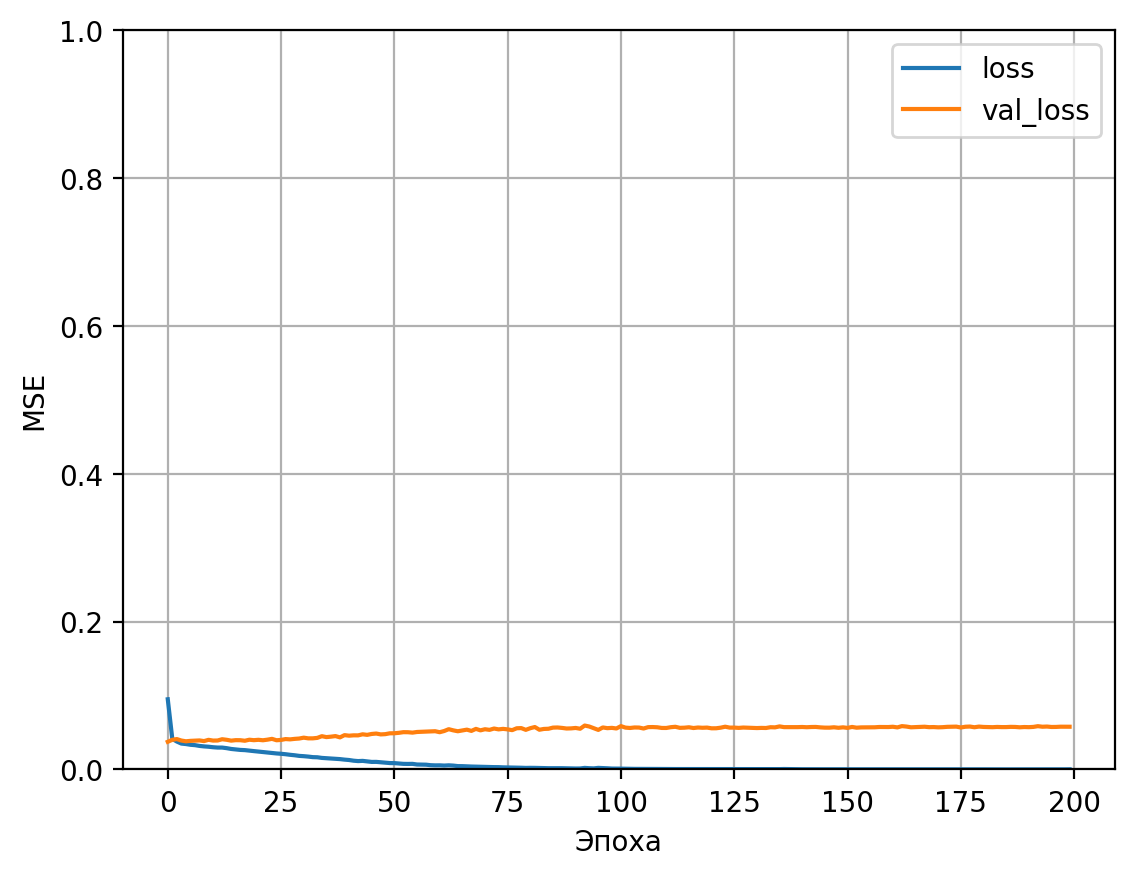

In [38]:
plot_loss(history)

In [67]:
# Создаем сеть с меньшим количеством слоев и нейронов

In [39]:
nn_model = Sequential([
                    normalizer,
                    Dense(8, activation = 'relu'),
                    Dense(8, activation = 'relu'),
                    Dense(1)
                    ])

nn_model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.0005))

In [40]:
nn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               3         
 n)                                                              
                                                                 
 dense_23 (Dense)            (None, 8)                 104       
                                                                 
 dense_24 (Dense)            (None, 8)                 72        
                                                                 
 dense_25 (Dense)            (None, 1)                 9         
                                                                 
Total params: 188
Trainable params: 185
Non-trainable params: 3
_________________________________________________________________


In [41]:
%%time
history = nn_model.fit(X_train, y_train, validation_split = 0.3, verbose = 1, epochs = 100)

Epoch 1/100
15/15 [==============================] - 1s 13ms/step - loss: 0.3974 - val_loss: 0.3554
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.3292 - val_loss: 0.3002
Epoch 3/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2804 - val_loss: 0.2603
Epoch 4/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2446 - val_loss: 0.2299
Epoch 5/100
15/15 [==============================] - 0s 6ms/step - loss: 0.2176 - val_loss: 0.2077
Epoch 6/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1981 - val_loss: 0.1905
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1818 - val_loss: 0.1756
Epoch 8/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1679 - val_loss: 0.1637
Epoch 9/100
15/15 [==============================] - 0s 6ms/step - loss: 0.1566 - val_loss: 0.1538
Epoch 10/100
15/15 [==============================] - 0s 7ms/step - loss: 0.1471 - val_loss: 0.1449
Epoch 11

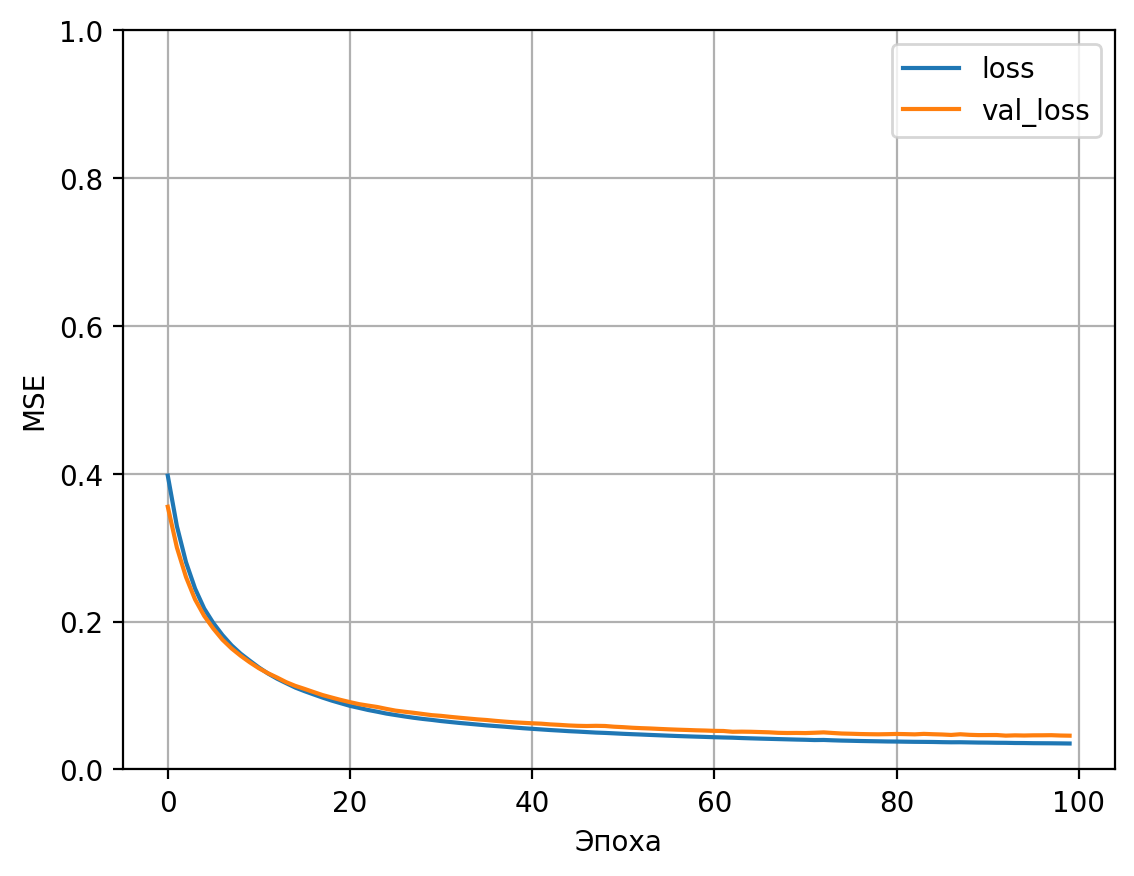

In [43]:
plot_loss(history)

In [68]:
# Меняем активатор

In [44]:
nn_model = Sequential([
                    normalizer,
                    Dense(8, activation = 'relu'),
                    Dense(8, activation = 'selu'),
                    Dense(1)
                    ])

nn_model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.0005))

In [46]:
nn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               3         
 n)                                                              
                                                                 
 dense_26 (Dense)            (None, 8)                 104       
                                                                 
 dense_27 (Dense)            (None, 8)                 72        
                                                                 
 dense_28 (Dense)            (None, 1)                 9         
                                                                 
Total params: 188
Trainable params: 185
Non-trainable params: 3
_________________________________________________________________


In [47]:
%%time
history = nn_model.fit(X_train, y_train, validation_split = 0.3, verbose = 1, epochs = 200)

Epoch 1/200
15/15 [==============================] - 1s 17ms/step - loss: 0.8606 - val_loss: 0.6632
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.7023 - val_loss: 0.5392
Epoch 3/200
15/15 [==============================] - 0s 6ms/step - loss: 0.5817 - val_loss: 0.4510
Epoch 4/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4913 - val_loss: 0.3813
Epoch 5/200
15/15 [==============================] - 0s 14ms/step - loss: 0.4170 - val_loss: 0.3291
Epoch 6/200
15/15 [==============================] - 0s 9ms/step - loss: 0.3606 - val_loss: 0.2868
Epoch 7/200
15/15 [==============================] - 0s 15ms/step - loss: 0.3165 - val_loss: 0.2509
Epoch 8/200
15/15 [==============================] - 0s 13ms/step - loss: 0.2759 - val_loss: 0.2233
Epoch 9/200
15/15 [==============================] - 0s 8ms/step - loss: 0.2446 - val_loss: 0.1982
Epoch 10/200
15/15 [==============================] - 0s 10ms/step - loss: 0.2175 - val_loss: 0.1807
Epoc

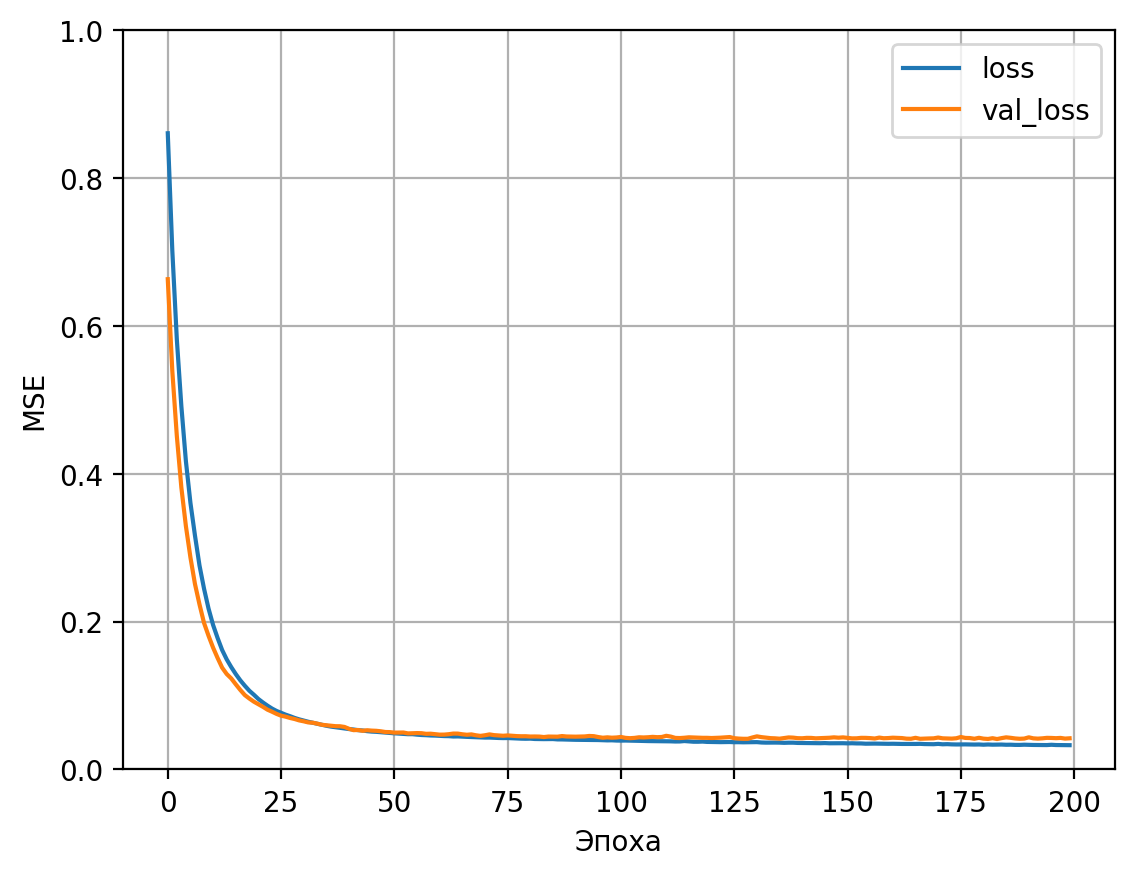

In [49]:
plot_loss(history)

In [ ]:
# Еще раз меняем набор активаторов

In [50]:
nn_model = Sequential([
                    normalizer,
                    Dense(8, activation = 'selu'),
                    Dense(8, activation = 'selu'),
                    Dense(1)
                    ])

nn_model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.0005))

In [51]:
nn_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               3         
 n)                                                              
                                                                 
 dense_29 (Dense)            (None, 8)                 104       
                                                                 
 dense_30 (Dense)            (None, 8)                 72        
                                                                 
 dense_31 (Dense)            (None, 1)                 9         
                                                                 
Total params: 188
Trainable params: 185
Non-trainable params: 3
_________________________________________________________________


In [52]:
%%time
history = nn_model.fit(X_train, y_train, validation_split = 0.3, verbose = 1, epochs = 200)

Epoch 1/200
15/15 [==============================] - 1s 20ms/step - loss: 0.5505 - val_loss: 0.4227
Epoch 2/200
15/15 [==============================] - 0s 7ms/step - loss: 0.4523 - val_loss: 0.3584
Epoch 3/200
15/15 [==============================] - 0s 5ms/step - loss: 0.3816 - val_loss: 0.3053
Epoch 4/200
15/15 [==============================] - 0s 8ms/step - loss: 0.3241 - val_loss: 0.2611
Epoch 5/200
15/15 [==============================] - 0s 5ms/step - loss: 0.2798 - val_loss: 0.2236
Epoch 6/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2415 - val_loss: 0.1952
Epoch 7/200
15/15 [==============================] - 0s 7ms/step - loss: 0.2120 - val_loss: 0.1720
Epoch 8/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1869 - val_loss: 0.1522
Epoch 9/200
15/15 [==============================] - 0s 7ms/step - loss: 0.1646 - val_loss: 0.1333
Epoch 10/200
15/15 [==============================] - 0s 8ms/step - loss: 0.1448 - val_loss: 0.1196
Epoch 11

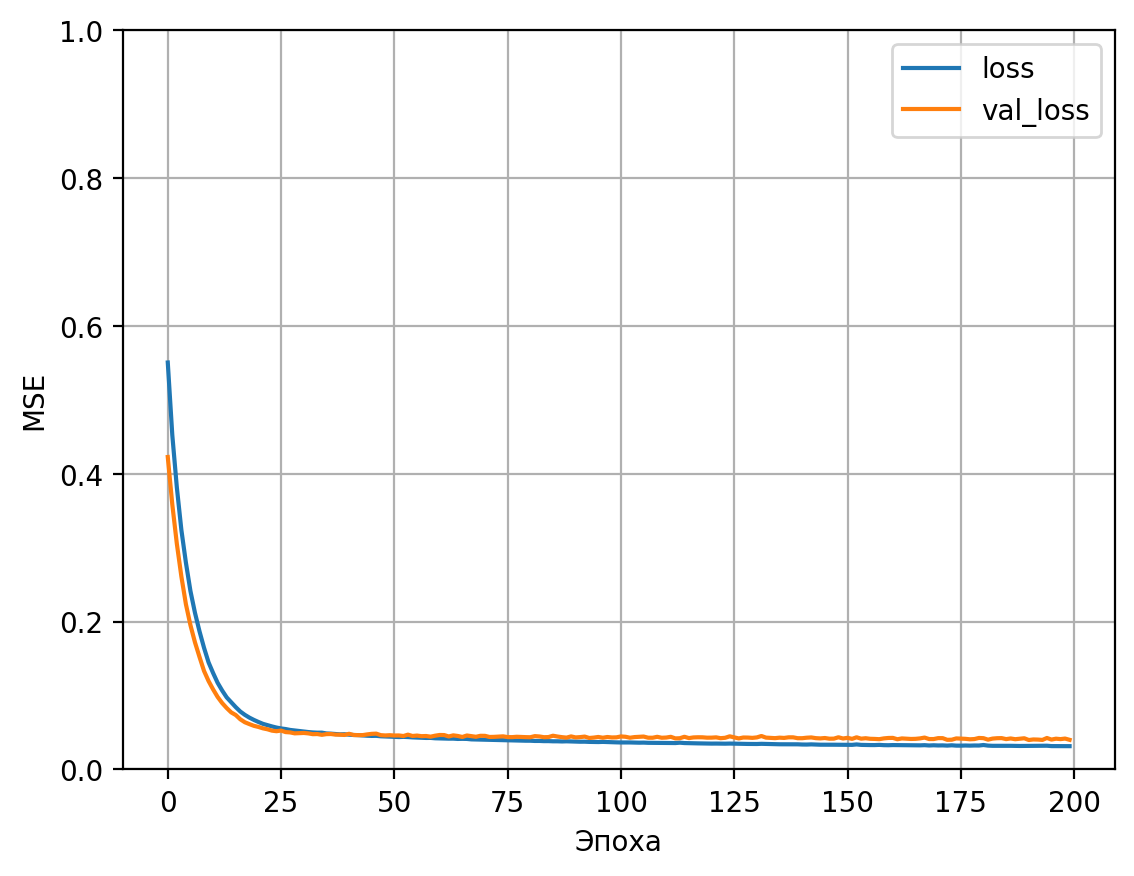

In [54]:
plot_loss(history)

In [59]:
nn_model = Sequential([
                    normalizer,
                    Dense(8, activation = 'relu'),
                    Dense(8, activation = 'sigmoid'),
                    Dense(1)
                    ])

nn_model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.0005))

In [60]:
nn_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               3         
 n)                                                              
                                                                 
 dense_32 (Dense)            (None, 8)                 104       
                                                                 
 dense_33 (Dense)            (None, 8)                 72        
                                                                 
 dense_34 (Dense)            (None, 1)                 9         
                                                                 
Total params: 188
Trainable params: 185
Non-trainable params: 3
_________________________________________________________________


In [61]:
%%time
history = nn_model.fit(X_train, y_train, validation_split = 0.3, verbose = 1, epochs = 200)

Epoch 1/200
15/15 [==============================] - 1s 18ms/step - loss: 1.5180 - val_loss: 1.3942
Epoch 2/200
15/15 [==============================] - 0s 13ms/step - loss: 1.3614 - val_loss: 1.2467
Epoch 3/200
15/15 [==============================] - 0s 11ms/step - loss: 1.2171 - val_loss: 1.1113
Epoch 4/200
15/15 [==============================] - 0s 8ms/step - loss: 1.0863 - val_loss: 0.9888
Epoch 5/200
15/15 [==============================] - 0s 14ms/step - loss: 0.9678 - val_loss: 0.8771
Epoch 6/200
15/15 [==============================] - 0s 15ms/step - loss: 0.8591 - val_loss: 0.7762
Epoch 7/200
15/15 [==============================] - 0s 11ms/step - loss: 0.7607 - val_loss: 0.6848
Epoch 8/200
15/15 [==============================] - 0s 11ms/step - loss: 0.6714 - val_loss: 0.6024
Epoch 9/200
15/15 [==============================] - 0s 16ms/step - loss: 0.5918 - val_loss: 0.5284
Epoch 10/200
15/15 [==============================] - 0s 14ms/step - loss: 0.5196 - val_loss: 0.4627


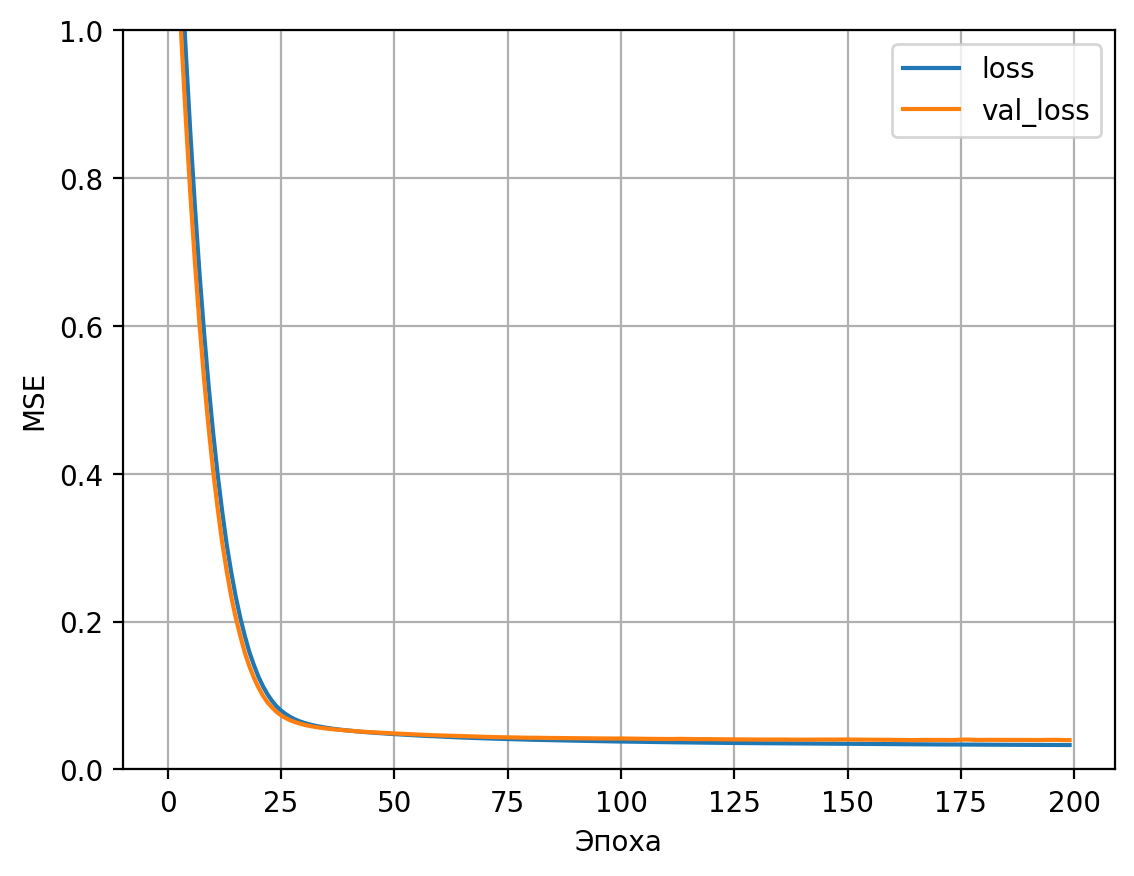

In [62]:
plot_loss(history)